# EI2001: Ciencia de Datos en Astronomía

**Profesores:** Pía Cortés, Daniela Barrientos, Matías Suazo, Matías Mattamala

## Minitarea 2: Uso de NumPy y matplotlib

**Objetivos:**

1. Poner en práctica el uso de librerías en python (específicamente NumPy y matplotlib)
2. Familiarizarse con el concepto de ndarray
3. Realizar gráficos personalizados


**Instrucciones:**

1. Lean cuidadosamente todo lo que viene ahora
2. Para hacer esta tarea deben que hacer un **fork** del repositorio en sus cuentas de GitHub.
4. Abrir [Google Colab](https://colab.research.google.com) y seleccionar "abrir un archivo desde GitHub". Deben seleccionar su cuenta Github y escoger el repositorio que corresponde al fork que hicieron.
5. Si todo sale bien, debería abrirse una copia de este notebook en su cuenta de Google Colab.
6. Se adjuntan 6 mini actividades a completar. **TODAS** son necesarias y deben completar lo que se va pidiendo.
7. Cada vez que completen un ítem, deben guardar un avance en su fork de GitHub, de modo de **respaldar cada avance significativo**. Usen comentarios coherentes con cada respaldo "Sección 1 completa", "Tarea terminada", no solamente el que pone por defecto.



## 1. Cargar datos

Para esta minitarea trabajaremos con la fotometría de algunas estrellas. El objetivo final de esta actividad es obtener un gráfico llamado **Diagrama de Color-Magnitud (CMD)**, este es una variante del [Diagrama de Hertzsprung Russell](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) (o diagrama HR) cuyo objetivo es ver la distribución en Brillo y Color (Luminosidad y Temperatura para el diagrama HR) de las estrellas de una población. Con este se puede reconocer las distintas etapas evolutivas en las que se encuentran las estrellas, sus edades y metalicidades. 


Comienza por cargar los datos de una población sintética. En el repositorio se encuentra el archivo de texto llamado **`phot.dat`** que contiene:

1. Fotometría en las bandas B, V, R, I (magnitud aparente)
2. Temperatura ($log_{10}(T_{eff} / K)$)
3. Masa [$M_{\odot}$]
4. Distancia [kpc] 


* Carga los datos a formato `ndarray` en la variable `datos` e inspecciona su forma y tamaño, como tambien las diferentes columnas.

In [2]:
import numpy as np

# Carga los datos a un ndarray

archivo = 'https://raw.githubusercontent.com/astrodatos/minitarea2/master/phot.dat'
datos = np.loadtxt(archivo)

# Inspecciona su forma y tamaño

print('Forma: ')
print(np.shape(datos))

print('\nTamaño: ')
print(np.size(datos))

#Columnas

mB = datos[:,0]
mV = datos[:,1]
mR = datos[:,2]
mI = datos[:,3]

temperatura = datos[:,4] #logaritmo en base 10 del cuociente
masa = datos[:,5] #en masas solares
distancia = datos[:,6] #en kiloparsecs

Forma: 
(5298, 7)

Tamaño: 
37086


## 2. Histogramas

El siguiente paso es inspeccionar los elementos en las diferentes columnas. Para ello crearás histogramas de algunas variables de interés. 

* Haz una figura con dos gráficos, uno al lado del otro, que contengan:

    1. Un histograma con las distribuciones de las magnitudes en las bandas B y V
    2. Un histograma con la distribución de masas

No olvides poner nombres a los ejes, titulos, leyendas, etc. Se creativo en el estilo de tu gráfico!

(array([  14., 4492.,   21.,   60.,  157.,  245.,  174.,   98.,   27.,
          10.]),
 array([1.99578392, 2.70653742, 3.41729092, 4.12804442, 4.83879792,
        5.54955142, 6.26030492, 6.97105842, 7.68181192, 8.39256542,
        9.10331892]),
 <a list of 10 Patch objects>)

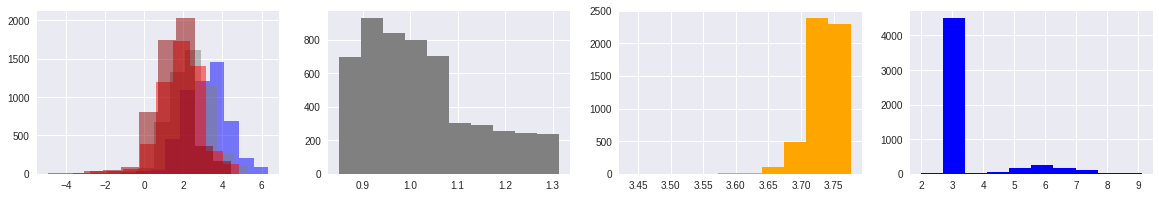

In [3]:
#Plotear histogramas de cada columna

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (20,3), ncols = 4)

ax[0].hist(mB,color='blue',alpha=0.5)
ax[0].hist(mV, color='gray',alpha=0.5)
ax[0].hist(mR, color='red',alpha=0.5)
ax[0].hist(mI, color='darkred',alpha=0.5)

ax[1].hist(masa, color='gray')

ax[2].hist(temperatura, color='orange')
ax[3].hist(distancia, color='blue')

## 3. Filtrar datos

Como te habrás dado cuenta hay dos distribuciones de distancia. La mayoría de las estrellas corresponden a la población sintética creada, mientras que el resto son estrellas de fondo. Para estudiar nuestro cúmulo, primero debemos filtrar las estrellas que no pertenecen a él. 

* Haz una copia del set de datos originales en la variable `datos_filtrados` y sólo utiliza las estrellas que cumplan con un criterio basado en el histograma anterior.
* Imprime en pantalla el tamaño original del set de datos y del nuevo filtrado con el siguiente formato: _"El set original contenía X estrellas, luego de filtrar quedaron X"_


In [4]:
#Filtrar por distancia

datos_filtrados = datos[datos[:,6]<=4].copy()


print("El set original contenía "+ str(np.size(datos)) +" estrellas, luego de filtrar quedaron "+ str(np.size(datos_filtrados)))

El set original contenía 37086 estrellas, luego de filtrar quedaron 31640


## 4. Función Magnitud Absoluta

Para hacer el CMD necesitamos la magnitud absoluta de nuestras estrellas. Para esto crearemos una función que la calcule.

* Crea la función **`mag_abs(mag_ap, dist)`** de la siguiente forma:
    * **Input:** 
        1. `mag_ap`: ndarray de magnitudes aparentes
        2. `dist`: ndarray de distancias en unidades de [parsec]
    * **Output:**
        1. `mag_abs`: ndarray de magnitudes absolutas calculadas como: $M = m - 5 \log_{10} (d_{pc}) + 5 $

In [0]:
#Funcion mag_abs(mag, dist)

def mag_abs(mag_ap, dist):
    
    mag_abs = mag_ap - 5*np.log10(dist) + 5
    return mag_abs

## 5. CMD

Ahora podemos graficar nuestro Diagrama Color Magnitud. 

* Crea los siguientes arreglos:
    1. `MV`: magnitud absoluta en la banda V
    2. `color`: resta entre las magnitudes B y V (B-V)
* Grafica MV vs color como se muestra en la siguiente [figura](https://www.astro.rug.nl/~ahelmi/galaxies_course/class_II/47tuc.gif). (**Hint: pon atención a los ejes)

Text(0.5,1,'Diagrama Color Magnitud (CMD)')

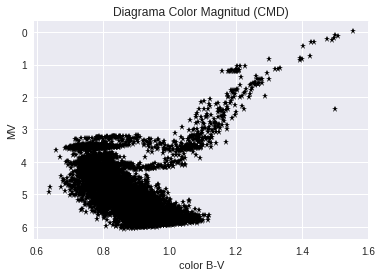

In [6]:
#Crear arrays MV y color
MV = mag_abs(mV, distancia)
color = mB - mV

#plot cmd
plt.plot(color, MV, '*', color='black')

plt.gca().invert_yaxis() #en la figura del ejemplo sale el eje y invertido

plt.xlabel('color B-V')
plt.ylabel('MV')

plt.title('Diagrama Color Magnitud (CMD)')


## 6. Densidades y otros

Ahora crearemos gráficos con un poco más de información en color. 
* Haz una figura con dos gráficos, uno al lado del otro:
    1. `MV vs color`, poninedo las masas de cada estrella en color (recuerda la barra de colores)
    2. `MV vs color`, poniendo la Temperatura de cada estrella en color
* Haz una figura con un gráfico que contenga:
    1. [Histograma en 2D](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html) con ejes `MV vs color` (esta figura muestra la densidad de estrellas en el espacio `MV vs color`)
    
No olvides poner **SIEMPRE** ejes a tus figuras, titulos, leyendas, etc. Elige mapas de colores donde se noten las características de los gráficos.

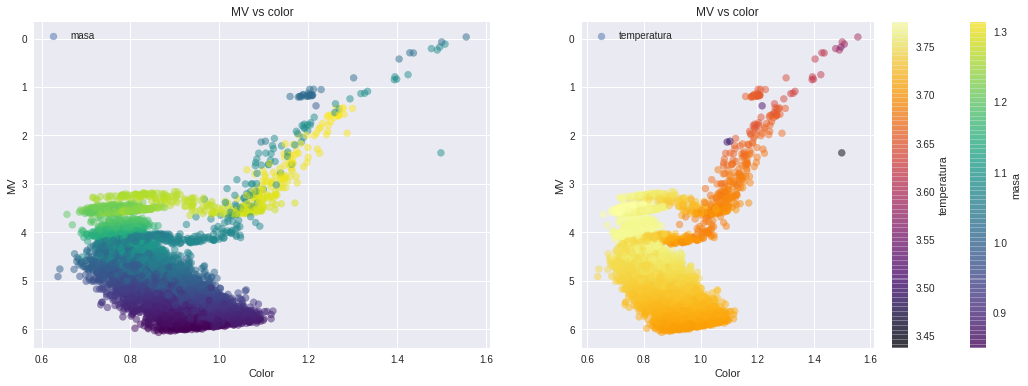

In [66]:
# plot cmd + masa / cmd + temp
fig1, axes = plt.subplots(figsize = (18,6), ncols=2)

cb = axes[0].scatter(color, MV, label = 'masa', c = masa, alpha = 0.5, cmap='viridis') #cmap es un mapa de colores. ej: cmat='viridis'

fig1.colorbar(cb).set_label('masa') #barra de colores que aparece con numeritos
axes[0].invert_yaxis()
#ax[0].tick_params(axis='both')
axes[0].set_ylabel('MV')
axes[0].set_xlabel('Color')
axes[0].set_title('MV vs color')
axes[0].legend()

cb = axes[1].scatter(color, MV, label = 'temperatura', c = temperatura, alpha = 0.5, cmap='inferno') #cmap es un mapa de colores. ej: cmat='viridis'
fig1.colorbar(cb).set_label('temperatura') #barra de colores que aparece con numeritos
axes[1].invert_yaxis()
axes[1].set_ylabel('MV')
axes[1].set_xlabel('Color')
axes[1].set_title('MV vs color')
axes[1].legend()





(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 array([0.63690103, 0.64710886, 0.65731669, 0.66752453, 0.67773236,
        0.68794019, 0.69814803, 0.70835586, 0.7185637 , 0.72877153,
        0.73897936, 0.7491872 , 0.75939503, 0.76960286, 0.7798107 ,
        0.79001853, 0.80022637, 0.8104342 , 0.82064203, 0.83084987,
        0.8410577 , 0.85126553, 0.86147337, 0.8716812 , 0.88188904,
        0.89209687, 0.9023047 , 0.91251254, 0.92272037, 0.9329282 ,
        0.94313604, 0.95334387, 0.96355171, 0.97375954, 0.98396737,
        0.99417521, 1.00438304, 1.01459087, 1.02479871, 1.03500654,
        1.04521438, 1.05542221, 1.06563004, 1.07583788, 1.08604571,
        1.09625354, 1.10646138, 1.11666921, 1.12687705, 1.13708488,
        1.14729271, 1.15750055, 1.16770838, 1.17791621, 1.18812405,
   

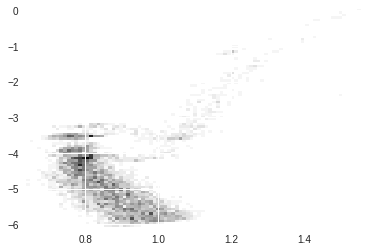

In [72]:
# plot cmd hist2D
plt.hist2d(color,-MV,bins=90,cmap='binary')